In [40]:
import json
output_path = f'/home/cbolanos/experiments/audioset/labels/distributions.json'

with open(output_path, 'r') as f:
   dist_dict = json.load(f)

In [41]:
import pandas as pd

df = pd.read_csv('/home/cbolanos/experiments/audioset/labels/labels_segments.csv')
unique_values = df['father_labels_ids'].unique() 


In [42]:
dist_dict.keys()

dict_keys(['404_true', '81_true', '72_true', '360_true', '73_true', '354_true', '0_false', '1_false', '2_false', '3_false', '4_false', '5_false', '6_false', '7_false', '8_false', '9_false', '10_false', '11_false', '12_false', '13_false', '14_false', '15_false', '16_false', '17_false', '18_false', '19_false', '20_false', '21_false', '22_false', '23_false', '24_false', '25_false', '26_false', '27_false', '28_false', '29_false', '30_false', '31_false', '32_false', '33_false', '34_false', '35_false', '36_false', '37_false', '38_false', '39_false', '40_false', '41_false', '42_false', '43_false', '44_false', '45_false', '46_false', '47_false', '48_false', '49_false', '50_false', '51_false', '52_false', '53_false', '54_false', '55_false', '56_false', '57_false', '58_false', '59_false', '60_false', '61_false', '62_false', '63_false', '64_false', '65_false', '66_false', '67_false', '68_false', '69_false', '70_false', '71_false', '74_false', '75_false', '76_false', '77_false', '78_false', '79_fa

In [43]:
import numpy as np

with open('/home/cbolanos/experiments/audioset/labels/distributions.json', 'r') as f:
    distributions = json.load(f)


def is_well_separated(pos_values, neg_values, threshold=1.3):
    """
    Check if distributions are well separated using pooled standard deviation
    """
    pos_mean = np.mean(pos_values)
    neg_mean = np.mean(neg_values)
    pos_std = np.std(pos_values)
    neg_std = np.std(neg_values)
    
    pooled_std = np.sqrt((pos_std**2 + neg_std**2) / 2)
    separation = abs(pos_mean - neg_mean) / pooled_std
    return separation > threshold

# Create a new dictionary with medians for true labels
medians = {}
for number in range(527):
    true_key = f'{number}_true'
    false_key = f'{number}_false'
    
    if true_key in distributions and false_key in distributions:
        # Get the distributions
        true_values = distributions[true_key]
        false_values = distributions[false_key]
        
        # Only include if we have enough samples and distributions are well separated
        if len(true_values) > 0 and len(false_values) > 0:
            if is_well_separated(true_values, false_values):
                median_value = np.median(true_values)
                medians[f'{number}'] = float(median_value)  # Convert to float for JSON serialization
            else:
                print(f"Label {number} is not well separated")

# Save the medians to a new JSON file
output_path = '/home/cbolanos/experiments/audioset/labels/true_medians.json'
with open(output_path, 'w') as f:
    json.dump(medians, f, indent=2)

print(f"Medians saved to: {output_path}")

Label 108 is not well separated
Label 134 is not well separated
Label 135 is not well separated
Label 138 is not well separated
Label 161 is not well separated
Label 354 is not well separated
Label 360 is not well separated
Label 404 is not well separated
Label 406 is not well separated
Label 440 is not well separated
Label 458 is not well separated
Label 473 is not well separated
Label 475 is not well separated
Label 477 is not well separated
Label 486 is not well separated
Label 487 is not well separated
Label 488 is not well separated
Label 489 is not well separated
Label 491 is not well separated
Label 496 is not well separated
Label 500 is not well separated
Label 505 is not well separated
Label 506 is not well separated
Label 513 is not well separated
Medians saved to: /home/cbolanos/experiments/audioset/labels/true_medians.json


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_logit_comparison(negative_logits, positive_logits, title="Distribution of Speech Logits"):
    """
    Plot the distribution of positive and negative logits with both histogram and kernel density estimation.
    
    Args:
        negative_logits (list or np.array): Array of negative class logit values
        positive_logits (list or np.array): Array of positive class logit values
        title (str): Title for the plot
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot both distributions
    sns.histplot(data=negative_logits, bins=30, kde=True, color='red', alpha=0.2)
    sns.histplot(data=positive_logits, bins=30, kde=True, color='green', alpha=0.2)
    
    # Add title and labels
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel('Logit Values', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Add legend
    plt.legend()
    
    # Add statistics annotations
    stats_text = (
        f'Positive Stats:\n'
        f'Mean: {np.mean(positive_logits):.3f}\n'
        f'Median: {np.median(positive_logits):.3f}\n'
        f'Std: {np.std(positive_logits):.3f}\n\n'
        f'Negative Stats:\n'
        f'Mean: {np.mean(negative_logits):.3f}\n'
        f'Median: {np.median(negative_logits):.3f}\n'
        f'Std: {np.std(negative_logits):.3f}'
    )
    
    # Position the stats text box
    plt.text(0.95, 0.95, stats_text,
             transform=ax.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    
    return fig, ax


/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


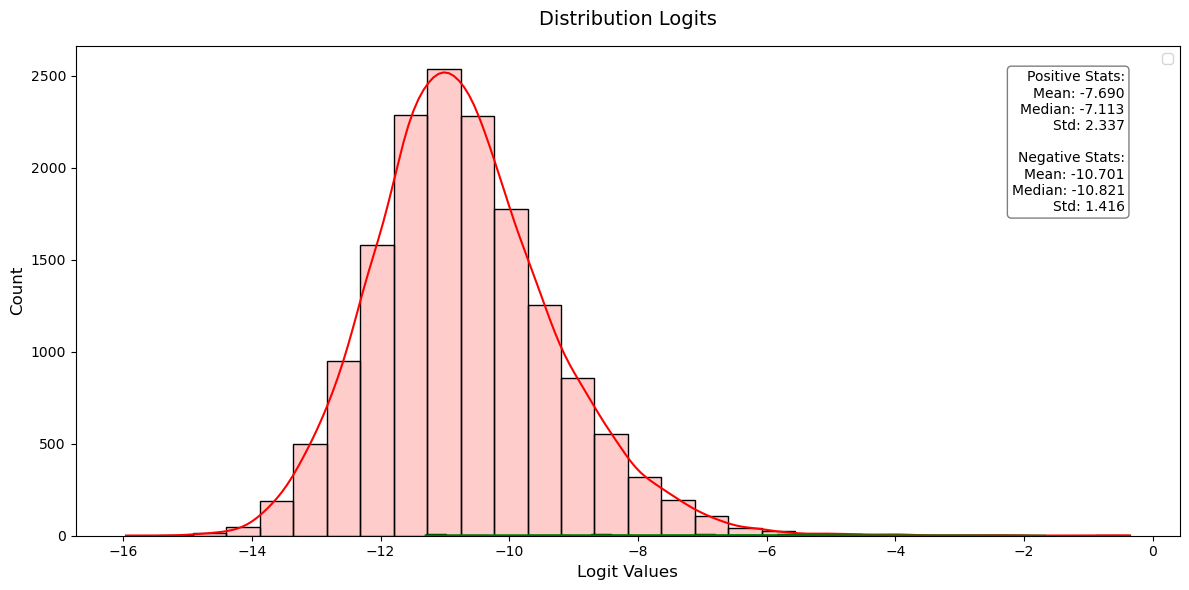

In [46]:
fig, ax = plot_logit_comparison(
    dist_dict['410_false'],
    dist_dict['410_true'],
    "Distribution Logits"
)
plt.show()